# PROBLEM STATEMENT 

## 1.Business Understanding

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. 

### Objective


Predict the overall risk of heart disease using logistic regression

### Variables:


Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.  


**Demographic**:

• Sex: male or female(Nominal)   
• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)  

**Behavioral**

• Current Smoker: whether or not the patient is a current smoker (Nominal)  
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)  

**Medical( history)**

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)  
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)  
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)  
• Diabetes: whether or not the patient had diabetes (Nominal)  

**Medical(current)**

• Tot Chol: total cholesterol level (Continuous)  
• Sys BP: systolic blood pressure (Continuous)  
• Dia BP: diastolic blood pressure (Continuous)  
• BMI: Body Mass Index (Continuous)  
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)  
• Glucose: glucose level (Continuous)  

**Predict variable (desired target)**

• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)  

### Import Libraries

In [1]:
import matplotlib.pyplot as plt #  for plotting
import seaborn as sns # for interactive plotting with colors /used for plot interactive graph. I like it most for plot
import numpy as np # for numerical calculation
import pandas as pd # for data manipulation,data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LogisticRegression # For building machine learning clasification model
from sklearn.model_selection import train_test_split # to split arrays or matrices into random train and test subsets
from sklearn.model_selection import GridSearchCV # to fine tune the parameters of your model
from sklearn.metrics import roc_auc_score # Compute Area Under the Receiver Operating Characteristic Curve from prediction scores.
from sklearn.pipeline import Pipeline # to assemble several steps that can be cross-validated together while setting different parameters
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler # Transform features by scaling each feature to a given range.
from sklearn.preprocessing import OneHotEncoder # Encode categorical features as a one-hot numeric array
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix , plot_confusion_matrix
from sklearn.compose import ColumnTransformer # Applies transformers to columns of an array or pandas DataFrame
import pickle # Pickle is used for serializing and de-serializing a Python object structure
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

### Load Dataset

In [2]:
data = pd.read_csv('framingham.csv')

In [3]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

## 2.Data Understanding

In [5]:
#previewing the dimensions or shape (rows and columns)of the data

data.shape

(4238, 16)

In [6]:
#previewing the information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [7]:
#Checking for duplicate values

data.duplicated().sum()

0

In [8]:
#previewing the summary numerical statistics of our data

data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
#previewing both numerical and categorical statistics

data.describe(include="all")

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


<AxesSubplot: >

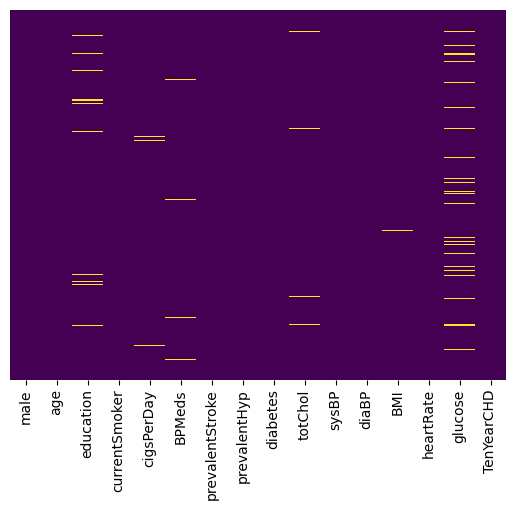

In [10]:
#Checking for missing values in our data

sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot: >

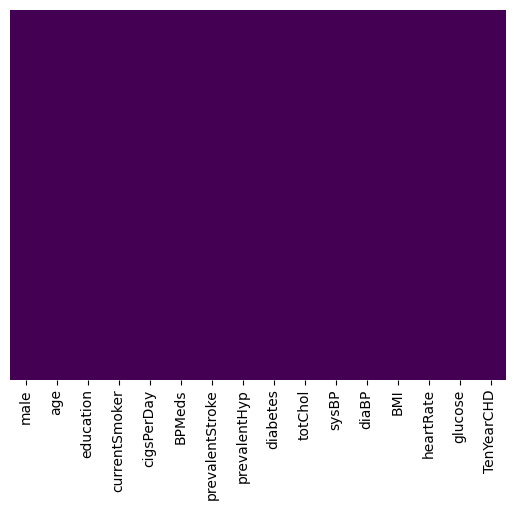

In [11]:
 # Removing rows with null values
    
data.dropna(inplace = True)
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## 3. Data Visualization

### I.Univariate analysis

#### Male

<AxesSubplot: xlabel='male', ylabel='count'>

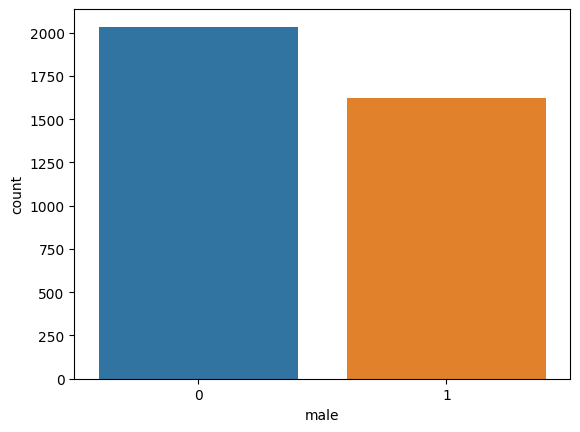

In [12]:
sns.countplot(data=data,x='male')

#### Age

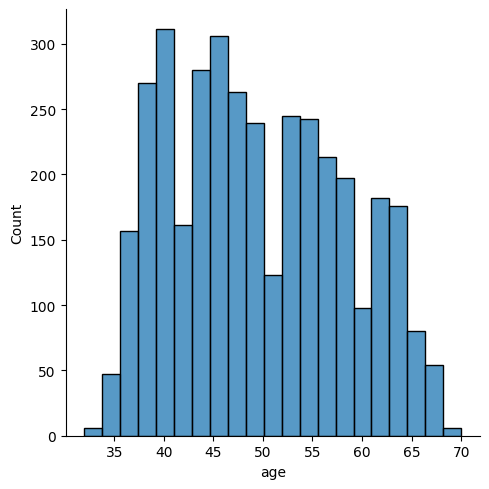

In [13]:
sns.displot(data=data,x='age')

#### Education

<AxesSubplot: xlabel='education', ylabel='count'>

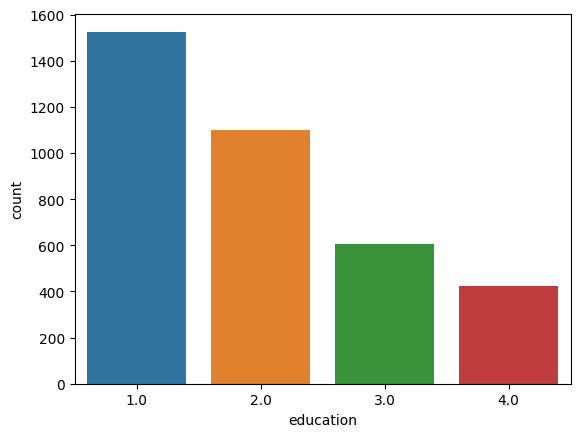

In [14]:
sns.countplot(data=data,x='education')

#### Current Smoker

<AxesSubplot: xlabel='currentSmoker', ylabel='count'>

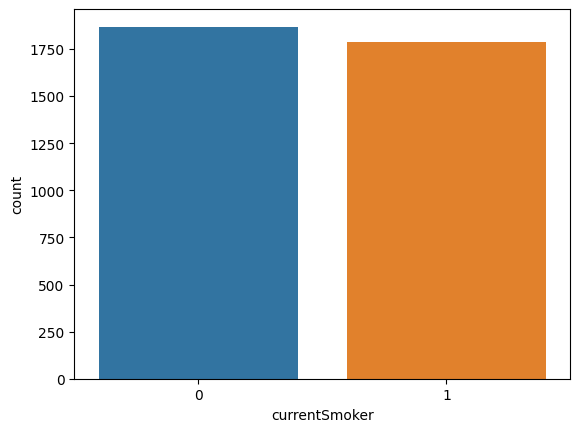

In [15]:
sns.countplot(data=data,x='currentSmoker')

#### BPMeds

<AxesSubplot: xlabel='BPMeds', ylabel='count'>

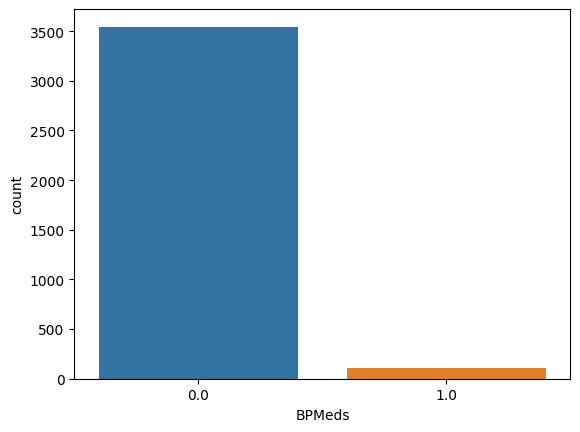

In [16]:
sns.countplot(data=data,x='BPMeds')

#### Prevalent Stroke

<AxesSubplot: xlabel='BPMeds', ylabel='count'>

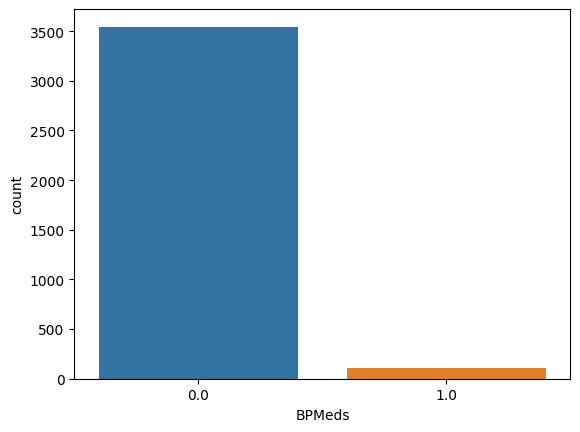

In [17]:
sns.countplot(data=data,x='BPMeds')

#### PrevalentHyp

<AxesSubplot: xlabel='prevalentHyp', ylabel='count'>

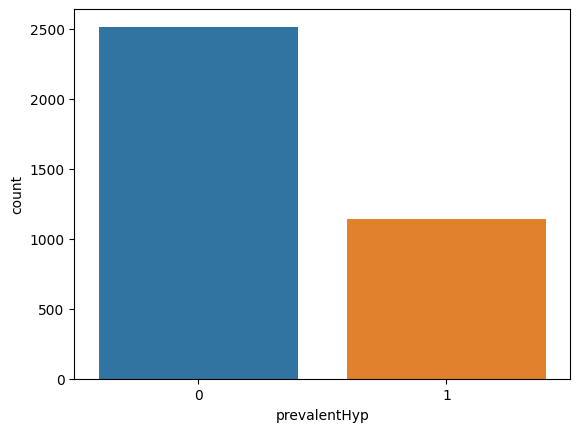

In [18]:
sns.countplot(data=data,x='prevalentHyp')

#### Diabetes

<AxesSubplot: xlabel='diabetes', ylabel='count'>

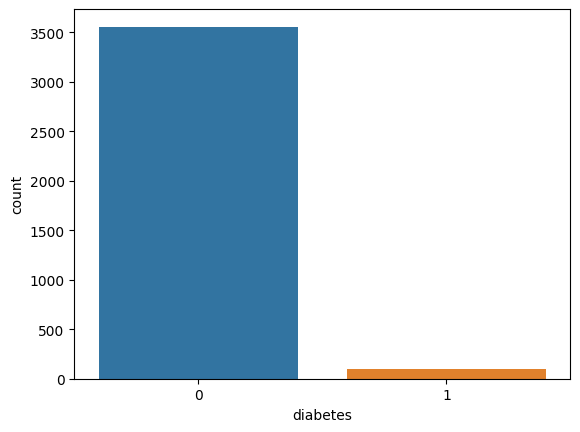

In [19]:
sns.countplot(data=data,x='diabetes')

#### totChol

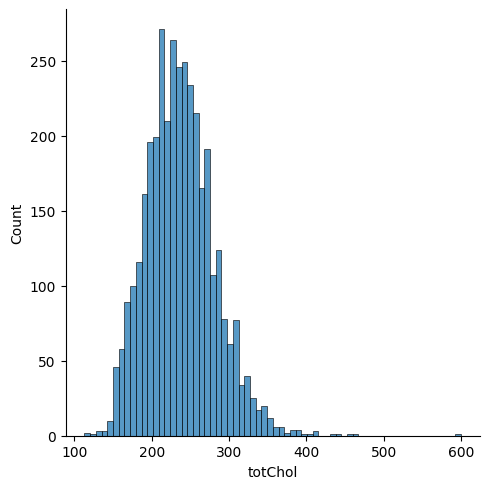

In [20]:
sns.displot(data=data,x='totChol')

#### sysBP

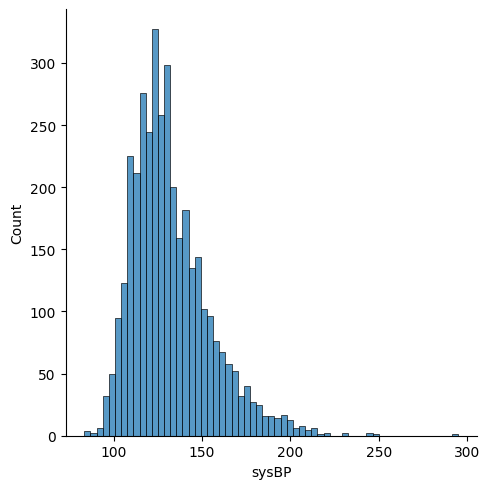

In [21]:
sns.displot(data=data,x='sysBP')

#### diaBP

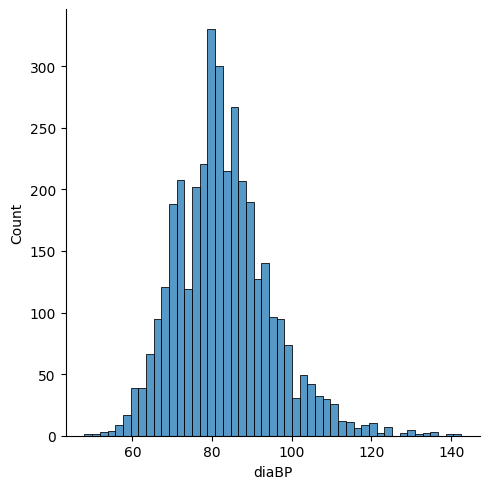

In [22]:
sns.displot(data=data,x='diaBP')

#### BMI

<AxesSubplot: ylabel='BMI'>

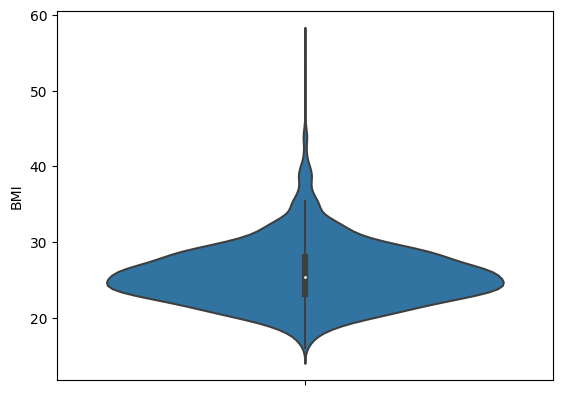

In [23]:
sns.violinplot(data=data,y='BMI')

#### Heart Rate

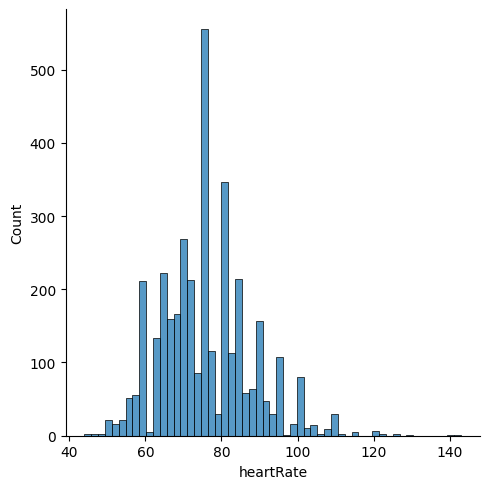

In [24]:
sns.displot(data=data,x='heartRate')

#### glucose	

<AxesSubplot: xlabel='glucose'>

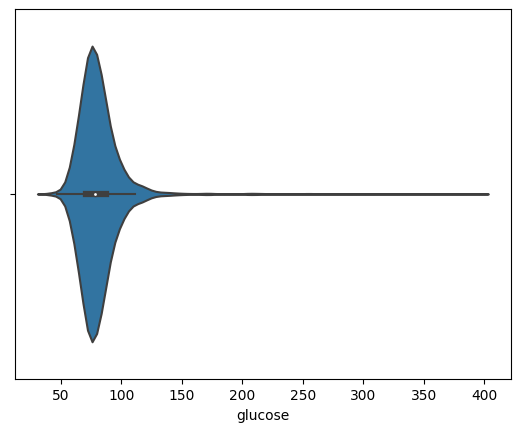

In [25]:
sns.violinplot(data=data,x='glucose')

#### TenYearCHD

<AxesSubplot: xlabel='TenYearCHD', ylabel='count'>

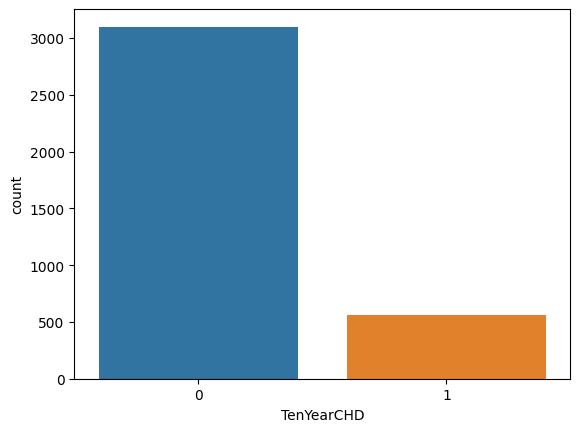

In [26]:
sns.countplot(data=data,x='TenYearCHD')

In [27]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### II.Bivariate analysis

#### Male vs TenYearCHD

<AxesSubplot: xlabel='male', ylabel='count'>

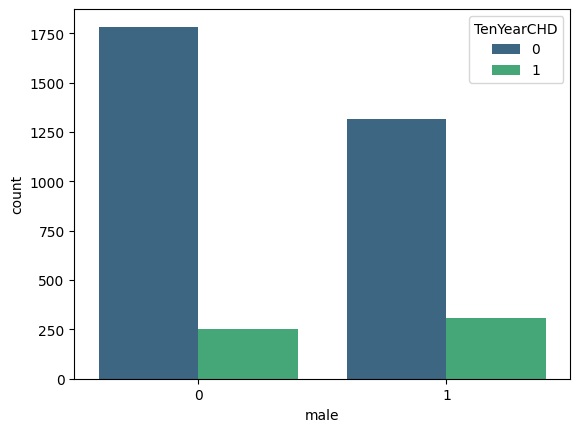

In [28]:
sns.countplot(data=data,x='male',hue='TenYearCHD',palette='viridis')

#### Current smoker vs TenYearCHD

<AxesSubplot: xlabel='currentSmoker', ylabel='count'>

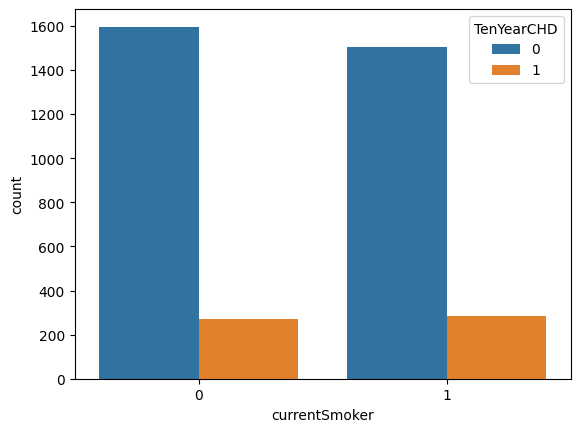

In [29]:
sns.countplot(data=data,x='currentSmoker',hue='TenYearCHD')

#### Diabetes vs TenYearCHD

<AxesSubplot: xlabel='diabetes', ylabel='count'>

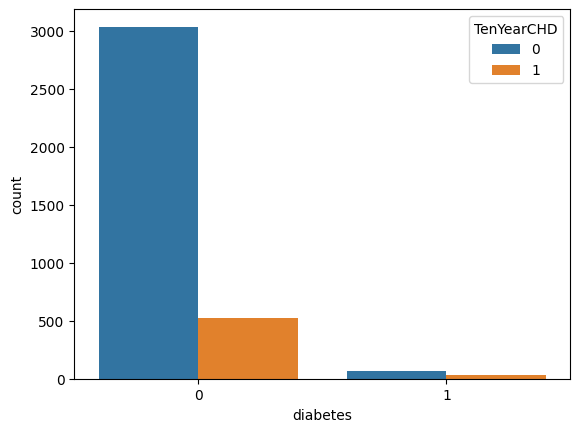

In [30]:
sns.countplot(data=data,x='diabetes',hue='TenYearCHD')

### III.Multivariate analysis

####  Diabetes vs totchol with TenYearCHD as hue

<AxesSubplot: xlabel='diabetes', ylabel='totChol'>

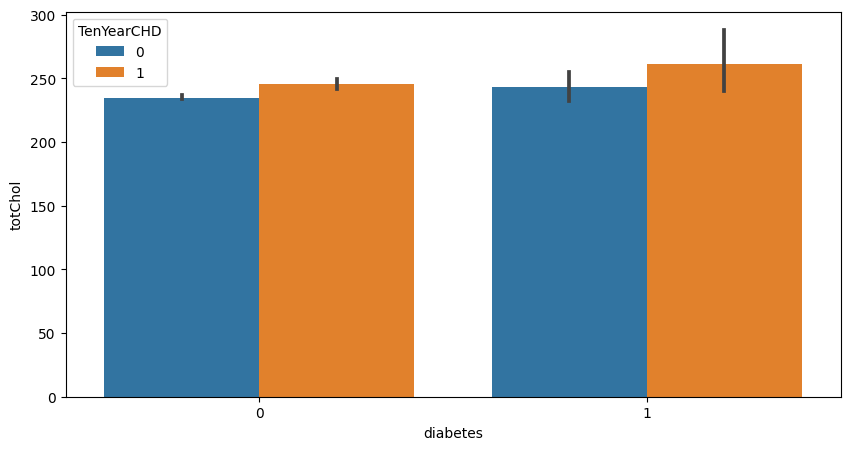

In [31]:
plt.figure(figsize=(10,5))

sns.barplot(data=data,x='diabetes',y='totChol',hue='TenYearCHD')

####  Diabetes vs glucose with TenYearCHD as hue

<AxesSubplot: xlabel='diabetes', ylabel='glucose'>

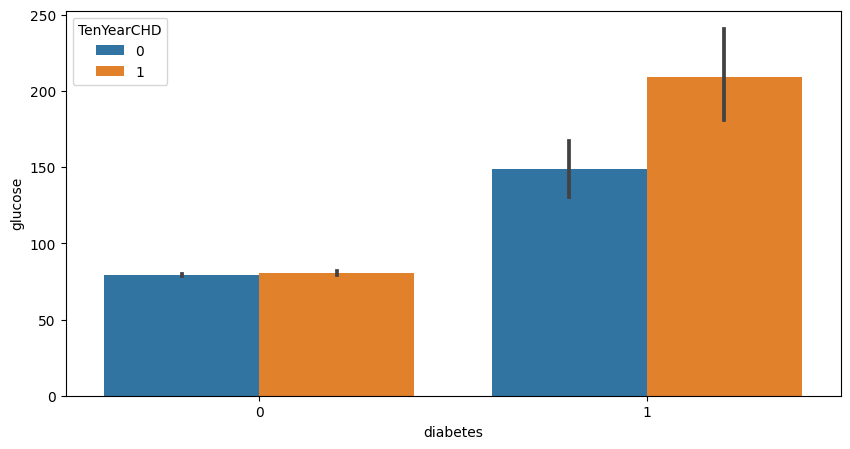

In [32]:
plt.figure(figsize=(10,5))

sns.barplot(data=data,x='diabetes',y='glucose',hue='TenYearCHD')

<AxesSubplot: >

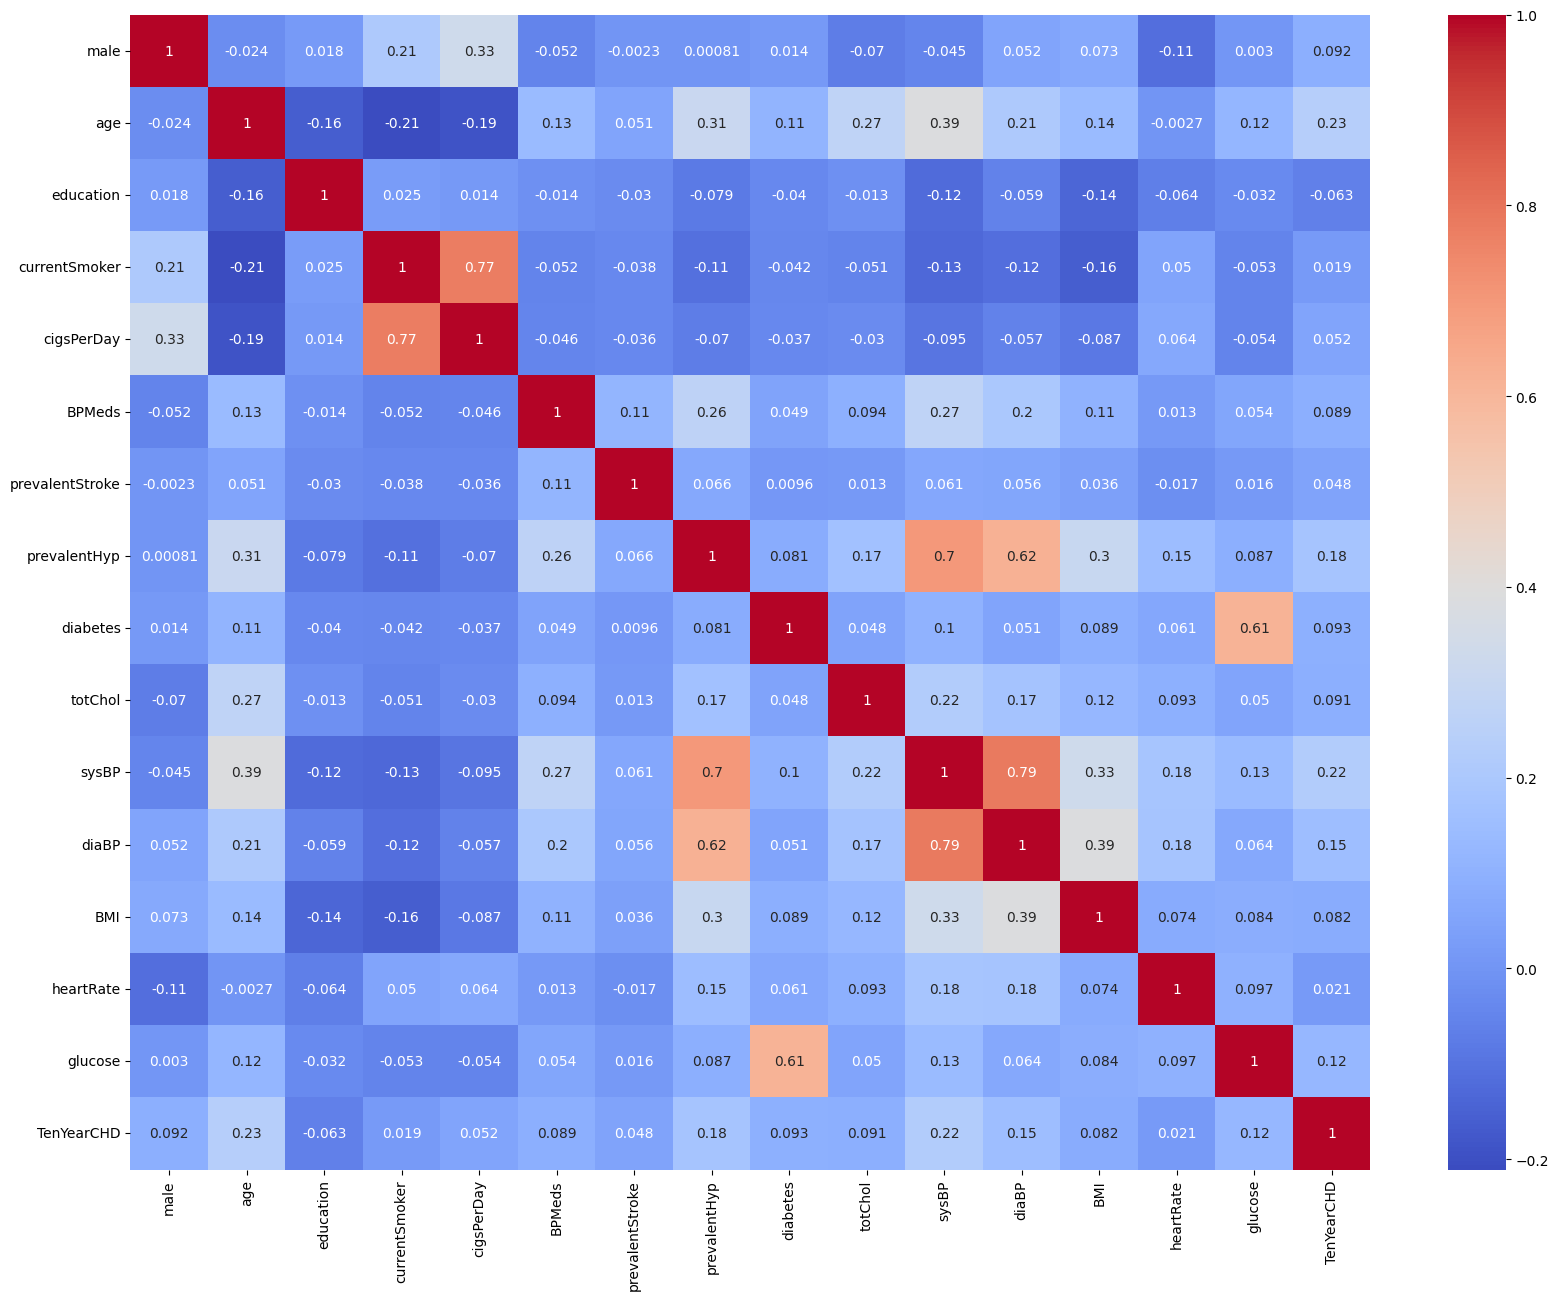

In [33]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

## 4.Data Preproccessing and Feature Engineering

In [34]:
#Rename TenYearCHD to target

data.rename(columns = {'TenYearCHD':'target' }, inplace=True)

In [35]:
# drop education column

data = data.drop('education' , axis=1)

### Remove Outliers

In [36]:
# drop outliers

class dropOutlier(BaseEstimator, TransformerMixin):
    
    def __init__(self,feat_with_outliers = ['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']):
        self.feat_with_outliers = feat_with_outliers
        
    def fit(self,data):
        return self
    
    def transform(self,data):
        if (set(self.feat_with_outliers).issubset(data.columns)):
            # 25% quantile
            Q1 = data[self.feat_with_outliers].quantile(.25)
            # 75% quantile
            Q3 = data[self.feat_with_outliers].quantile(.75)
            IQR = Q3 - Q1
            # keep the data within 3 IQR
            data = data[~((data[self.feat_with_outliers] < (Q1 - 3 * IQR)) |(data[self.feat_with_outliers] > (Q3 + 3 * IQR))).any(axis=1)]
            return data
        else:
            print("One or more features are not in the dataframe")
            return data


In [37]:
#calling Outlier transformer

dropOut = dropOutlier()

df = dropOut.fit_transform(data)

### Scale Features

In [38]:
# scaling the features

class inputScaler( BaseEstimator, TransformerMixin):
   
    def __init__(self, feat_to_scale = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']):
        self.feat_to_scale = feat_to_scale
        
    def fit(self,data):
        return self
    
    def transform(self, data):
        if (set(self.feat_to_scale).issubset(data.columns)):
            min_max_scaler = MinMaxScaler()
            data[self.feat_to_scale] = min_max_scaler.fit_transform(data[self.feat_to_scale])
            return data
        else:
            print("One or more features are not in the dataframe")
            return data
            

In [39]:
# calling the scaler transformer

scaler = inputScaler()

df = scaler.fit_transform(df)

### Balance data with SMOTE

In [40]:
#Balancing the data set

class Oversample(BaseEstimator,TransformerMixin):
    def __init__(self, X =data.drop('target',axis=1), y= data['target'] ):
        self.X = X
        self.y = y
    
    def fit(self,data):
        return self
    
    def transform(self,data):
        if 'target' in data.columns:
            # smote function to oversample the minority class to fix the imbalance data
            oversample = SMOTE(sampling_strategy='minority')
            X_sm, y_sm = oversample.fit_resample(self.X, self.y)
            data_sm = pd.concat([pd.DataFrame(X_sm),pd.DataFrame(y_sm)],axis=1)
            return data_sm
        else:
            print("target is not in the dataframe")
            return data

In [41]:
#calling the SMOTE transformer

sm = Oversample()

df = sm.fit_transform(df)

In [42]:
#Checking the ratio of 0 and 1 in our target column

df['target'].value_counts()

0    3099
1    3099
Name: target, dtype: int64

In [43]:
df.shape

(6198, 15)

### Defining predictor variables and target variable

In [44]:
#Dependent variable is also referred as target variable and the independent variables are called the predictors.

X = df.drop('target',axis=1)
y = df['target']

### Splitting data into train and test set

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42,shuffle=True)

In [46]:
model = RandomForestClassifier(n_estimators=300) 

In [47]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [48]:
predictions = model.predict(X_test)

## 5.Evaluation

In [49]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[899 116]
 [124 907]]


              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1015
           1       0.89      0.88      0.88      1031

    accuracy                           0.88      2046
   macro avg       0.88      0.88      0.88      2046
weighted avg       0.88      0.88      0.88      2046



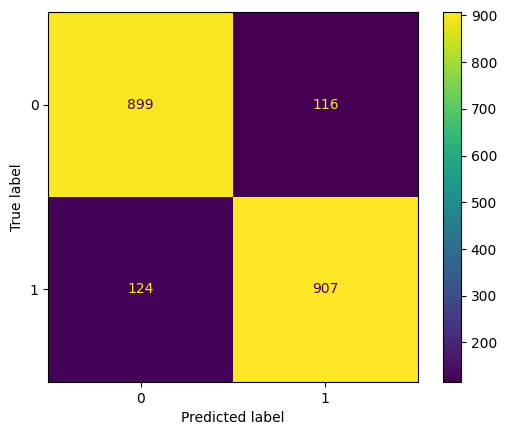

In [50]:
plot_confusion_matrix(model, X_test,y_test)

In [51]:
model.score(X_test, y_test)

0.8826979472140762

## 6.Deploying

In [52]:
# saving model

filename = 'finalized_model.sav'
pickle.dump(model,open(filename,'wb'))

In [53]:
#Loading model

loaded_model = pickle.load(open(filename, 'rb'))


In [54]:
sample = df.sample()

sample


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,target
5350,0,66,0,0.0,0.84992,0,1,0,229.951039,145.350719,85.60032,28.337398,65.0,75.0,1


In [55]:
#storing prediction in result variable

result = loaded_model.predict(sample.drop('target', axis = 1))



In [56]:
# 0 No
# 1 yes 

result[0]

1

In [57]:
df.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'target'],
      dtype='object')